In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Иницилизация

In [71]:
a,b = 0,1
n = 100
t = np.linspace(a,b,n)
s = np.linspace(a,b,n)
x = np.linspace(a,b,n)
alpha = 1e-6
eps = 0.001
q = 1
p = 1
right_side = np.full(n,np.NAN)
left_side = np.full((n,n),np.NAN)
real_one = np.full(n,np.NAN)
A = np.ones(n)
A[0],A[n - 1] = 0.5,0.5
h = (b - a) / (n - 1)

In [72]:
for i in range(n):
    real_one[i] = np.sin(x[i])

In [73]:
real_one

array([0.        , 0.01010084, 0.02020065, 0.03029839, 0.04039305,
       0.05048358, 0.06056897, 0.07064817, 0.08072016, 0.09078392,
       0.10083842, 0.11088263, 0.12091552, 0.13093608, 0.14094328,
       0.1509361 , 0.16091352, 0.17087452, 0.18081808, 0.1907432 ,
       0.20064886, 0.21053404, 0.22039774, 0.23023896, 0.24005668,
       0.24984992, 0.25961766, 0.26935891, 0.27907268, 0.28875797,
       0.2984138 , 0.30803919, 0.31763315, 0.3271947 , 0.33672286,
       0.34621667, 0.35567516, 0.36509735, 0.3744823 , 0.38382904,
       0.39313661, 0.40240408, 0.41163048, 0.42081489, 0.42995636,
       0.43905397, 0.44810678, 0.45711386, 0.46607431, 0.47498721,
       0.48385164, 0.49266671, 0.5014315 , 0.51014514, 0.51880673,
       0.52741539, 0.53597023, 0.54447039, 0.55291499, 0.56130318,
       0.56963411, 0.57790691, 0.58612075, 0.59427479, 0.60236819,
       0.61040014, 0.6183698 , 0.62627638, 0.63411905, 0.64189703,
       0.64960951, 0.65725572, 0.66483486, 0.67234618, 0.67978

In [74]:
A

array([0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5])

In [75]:
left_side

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [76]:
right_side

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

Симетризованное ядро интегрального уравнения

In [77]:
def G_star_ts(t: float,s: float):
    if s > t:
        return (1 / (4 * (-np.exp(4) + 2 * np.exp(2) - 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t + np.exp(4 - t - s) * s + np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t + np.exp(s + t) * s + np.exp(s + t) * t - np.exp(2 + s + t) * s - np.exp(2 + s + t) * t - np.exp(s - t) * s + np.exp(s - t) * t - np.exp(t + 4 - s) * s + np.exp(t + 4 - s) * t - np.exp(2 - t - s) * s - np.exp(2 - t - s) * t - np.exp(2 + t - s) + np.exp(4 - t - s) - 3 * np.exp(2 - t + s) - np.exp(s + t) + 3 * np.exp(2 + s + t) + np.exp(s - t) - np.exp(t + 4 - s) + np.exp(2 - t - s))
    else:
        return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t - np.exp(4 - t - s) * s - np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t - np.exp(s + t) * s - np.exp(s + t) * t + np.exp(2 + s + t) * s + np.exp(2 + s + t) * t - np.exp(4 - t + s) * s + np.exp(4 - t + s) * t - np.exp(t - s) * s + np.exp(t - s) * t + np.exp(2 - t - s) * s + np.exp(2 - t - s) * t + 3 * np.exp(2 + t - s) - np.exp(4 - t - s) + np.exp(2 - t + s) + np.exp(s + t) - 3 * np.exp(2 + s + t) + np.exp(4 - t + s) - np.exp(t - s) - np.exp(2 - t - s))

Правая часть (как в первой лабораторной)

In [78]:
def y_star(t: float):
    return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.sin(t) * np.exp(4) + np.sin(1) * t * np.exp(3 + t) + np.sin(1) * t * np.exp(3 - t) - np.sin(1) * t * np.exp(1 + t) - np.sin(1) * t * np.exp(1 - t) - np.sin(t) * 2 * np.exp(2) - np.sin(1) * 2 * np.exp(3 + t) + np.sin(1) * 2 * np.exp(3 - t) + np.sin(t))
def y_star1(t: float):
    return (1 / (-2 * np.exp(4) + 4 * np.exp(2) - 2)) * (np.sin(1) * (1 + t) * np.exp(-1 * t + 1) + np.sin(1) * (4 * np.exp(2) * t - 2 * np.exp(4) * t + t * np.exp(1 + t) - t * np.exp(3 - t) - t * np.exp(t + 3) - 2 * t - np.exp(1 + t) - 3 * np.exp(3 - t) + 3 * np.exp(t + 3)))

## Ход основного алгоритма

In [79]:
for i in range(n):
    right_side[i] = y_star(t[i]) - y_star1(t[i])
    

In [80]:
for i in range(1,n-1):
    for j in range(n):
        left_side[i,j] = h * A[j] * G_star_ts(t[i],s[j])

In [81]:
for i in range(1,n-1):
    left_side[i,i] = (alpha * q - (2 * alpha * p) / (h ** 2)) + h * G_star_ts(t[i],s[i]) * A[i]
    left_side[i,i-1] = ((alpha * p) / (h ** 2)) + h * G_star_ts(t[i],s[i]) * A[i]
    left_side[i,i+1] = ((alpha * p) / (h ** 2)) + h * G_star_ts(t[i],s[i]) * A[i]
left_side[0,1:] = 0
left_side[0,0] = 1
left_side[-1,0:-1] = 0
left_side[-1,-1] = 1
right_side[0] = 0
right_side[-1] = 0

In [82]:
right_side

array([0.00000000e+00, 1.59702705e-05, 3.19251272e-05, 4.78491698e-05,
       6.37270247e-05, 7.95433582e-05, 9.52828900e-05, 1.10930406e-04,
       1.26470774e-04, 1.41888951e-04, 1.57170004e-04, 1.72299117e-04,
       1.87261606e-04, 2.02042935e-04, 2.16628724e-04, 2.31004762e-04,
       2.45157025e-04, 2.59071682e-04, 2.72735112e-04, 2.86133915e-04,
       2.99254922e-04, 3.12085209e-04, 3.24612111e-04, 3.36823230e-04,
       3.48706445e-04, 3.60249932e-04, 3.71442164e-04, 3.82271931e-04,
       3.92728346e-04, 4.02800856e-04, 4.12479254e-04, 4.21753689e-04,
       4.30614675e-04, 4.39053100e-04, 4.47060236e-04, 4.54627750e-04,
       4.61747712e-04, 4.68412602e-04, 4.74615318e-04, 4.80349189e-04,
       4.85607977e-04, 4.90385888e-04, 4.94677576e-04, 4.98478155e-04,
       5.01783200e-04, 5.04588758e-04, 5.06891347e-04, 5.08687971e-04,
       5.09976118e-04, 5.10753765e-04, 5.11019388e-04, 5.10771957e-04,
       5.10010950e-04, 5.08736348e-04, 5.06948641e-04, 5.04648830e-04,
      

In [83]:
left_side

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.80129662e-03, -1.96007034e-02,  9.80129662e-03, ...,
         2.74395150e-07,  1.37235315e-07,  3.84618056e-19],
       [ 8.24181548e-20,  9.80215938e-03, -1.95998406e-02, ...,
         5.48639325e-07,  2.74395150e-07,  1.92309028e-19],
       ...,
       [-1.23627232e-19,  2.74395150e-07,  5.48639325e-07, ...,
        -1.95998406e-02,  9.80215938e-03,  1.78572669e-19],
       [ 2.47254464e-19,  1.37235315e-07,  2.74395150e-07, ...,
         9.80129662e-03, -1.96007034e-02,  9.80129662e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [88]:

qq = np.linalg.solve(left_side,right_side) + t * np.sin(1)

## Построение графиков

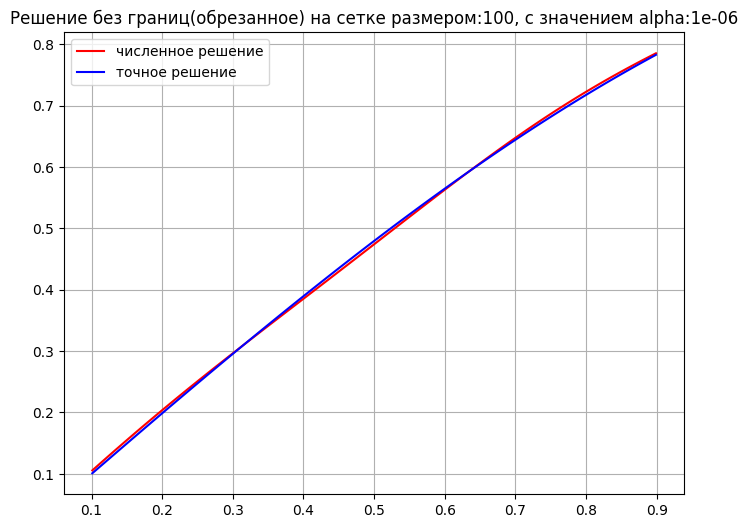

In [91]:
plt.figure(figsize=(8, 6))
plt.title(f'Решение без границ(обрезанное) на сетке размером:{n}, с значением alpha:{alpha}')
plt.plot(x[10:90],qq[10:90],label = 'численное решение',color = 'red')
plt.plot(x[10:90],real_one[10:90],label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

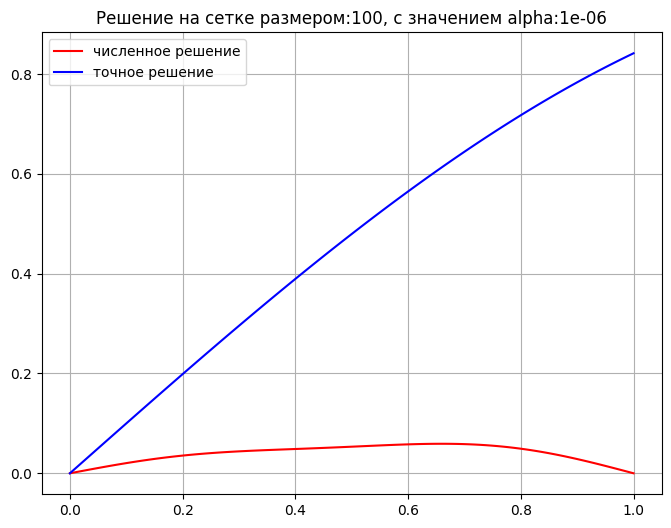

In [86]:
plt.figure(figsize=(8, 6))
plt.title(f'Решение на сетке размером:{n}, с значением alpha:{alpha}')
plt.plot(x,np.linalg.solve(left_side,right_side),label = 'численное решение',color = 'red')
plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

# Анализ коэфициента альфа

In [110]:
%reset -f

In [111]:
import numpy as np
import matplotlib.pyplot as plt

In [112]:
a,b = 0,1
n = 100
t = np.linspace(a,b,n)
s = np.linspace(a,b,n)
x = np.linspace(a,b,n)
alpha = 1e-6
eps = 0.01
q = 1
p = 0.01
right_side = np.full(n,np.NAN)
left_side = np.full((n,n),np.NAN)
real_one = np.full(n,np.NAN)
A = np.ones(n)
A[0],A[n - 1] = 0.5,0.5
h = (b - a) / (n - 1)

In [113]:
for i in range(n):
    real_one[i] = np.sin(x[i])

In [114]:
def G_star_ts(t: float,s: float):
    if s > t:
        return (1 / (4 * (-np.exp(4) + 2 * np.exp(2) - 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t + np.exp(4 - t - s) * s + np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t + np.exp(s + t) * s + np.exp(s + t) * t - np.exp(2 + s + t) * s - np.exp(2 + s + t) * t - np.exp(s - t) * s + np.exp(s - t) * t - np.exp(t + 4 - s) * s + np.exp(t + 4 - s) * t - np.exp(2 - t - s) * s - np.exp(2 - t - s) * t - np.exp(2 + t - s) + np.exp(4 - t - s) - 3 * np.exp(2 - t + s) - np.exp(s + t) + 3 * np.exp(2 + s + t) + np.exp(s - t) - np.exp(t + 4 - s) + np.exp(2 - t - s))
    else:
        return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t - np.exp(4 - t - s) * s - np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t - np.exp(s + t) * s - np.exp(s + t) * t + np.exp(2 + s + t) * s + np.exp(2 + s + t) * t - np.exp(4 - t + s) * s + np.exp(4 - t + s) * t - np.exp(t - s) * s + np.exp(t - s) * t + np.exp(2 - t - s) * s + np.exp(2 - t - s) * t + 3 * np.exp(2 + t - s) - np.exp(4 - t - s) + np.exp(2 - t + s) + np.exp(s + t) - 3 * np.exp(2 + s + t) + np.exp(4 - t + s) - np.exp(t - s) - np.exp(2 - t - s))

In [115]:
def y_star(t: float):
    return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.sin(t) * np.exp(4) + np.sin(1) * t * np.exp(3 + t) + np.sin(1) * t * np.exp(3 - t) - np.sin(1) * t * np.exp(1 + t) - np.sin(1) * t * np.exp(1 - t) - np.sin(t) * 2 * np.exp(2) - np.sin(1) * 2 * np.exp(3 + t) + np.sin(1) * 2 * np.exp(3 - t) + np.sin(t))
def y_star1(t: float):
    return (1 / (-2 * np.exp(4) + 4 * np.exp(2) - 2)) * (np.sin(1) * (1 + t) * np.exp(-1 * t + 1) + np.sin(1) * (4 * np.exp(2) * t - 2 * np.exp(4) * t + t * np.exp(1 + t) - t * np.exp(3 - t) - t * np.exp(t + 3) - 2 * t - np.exp(1 + t) - 3 * np.exp(3 - t) + 3 * np.exp(t + 3)))

In [116]:
for i in range(n):
    right_side[i] = (1 + eps * (2 * np.random.uniform(0,1,1)[0] - 1)) * (y_star(t[i]) - y_star1(t[i]))
# def phi(s: float) -> float:
#     # return ((1/2) * (np.exp(s-1) - np.exp(-s + 1))) * np.exp(1) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
#     return ((0.5) * (np.exp(s-1) - np.exp(-s + 1)) * np.exp(1)) / (np.exp(2) - 1)

# def theta(s: float) -> float:
#     # return ((1/2) * (np.exp(s) - np.exp(-s))) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
#     return ((0.5) * (np.exp(s) - np.exp(-s)) * np.exp(1)) / (np.exp(2) - 1)

# def y(x: float,eps: float) -> float:
#     return (1 + eps * (2 * np.random.uniform(0,1,1)[0] - 1)) * (-0.5 * (np.sin(x) * np.exp(2) + np.sin(1) * np.exp(-x + 1) - np.sin(1) * np.exp(x + 1) - np.sin(x))) / (np.exp(2) - 1)

# def y_star(t: float) -> float:
#     sum = 0
#     for i in range(1, n-1):
#         if x[i] < t:
#             sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y(x[i],eps)
#             # sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y(x[i])
#         else:
#             # sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y(x[i])
#             sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y(x[i],eps)
#     sum *= 2
#     sum += phi(t) * (np.exp(x[0]) - np.exp(-x[0])) * y(x[0],eps) + \
#         theta(t) * (np.exp(x[n-1] - 1) - np.exp(-x[n-1] + 1)) * y(x[n-1],eps)
#     return (h/2) * sum

# def y1(s: float,eps: float) -> float:
#     return (1 + eps * (2 * np.random.uniform(0,1,1)[0] - 1)) * (s * np.sin(1))

# def y_star1(t: float) -> float:
#     sum = 0
#     for i in range(1, n-1):
#         if x[i] < t:
#             sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y(x[i],eps)
#             # sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y(x[i])
#         else:
#             # sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y(x[i])
#             sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y(x[i],eps)
#     sum *= 2
#     sum += phi(t) * (np.exp(x[0]) - np.exp(-x[0])) * y(x[0],eps) + \
#         theta(t) * (np.exp(x[n-1] - 1) - np.exp(-x[n-1] + 1)) * y(x[n-1],eps)
#     return (h/2) * sum

In [117]:
for i in range(1,n-1):
    for j in range(n):
        left_side[i,j] = h * A[j] * G_star_ts(t[i],s[j])

In [118]:
for i in range(1,n-1):
    left_side[i,i] = (alpha * q - (2 * alpha * p) / (h ** 2)) + h * G_star_ts(t[i],s[i]) * A[i]
    left_side[i,i-1] = ((alpha * p) / (h ** 2)) + h * G_star_ts(t[i],s[i]) * A[i]
    left_side[i,i+1] = ((alpha * p) / (h ** 2)) + h * G_star_ts(t[i],s[i]) * A[i]
left_side[0,1:] = 0
left_side[0,0] = 1
left_side[-1,0:-1] = 0
left_side[-1,-1] = 1
right_side[0] = 0
right_side[-1] = 0

In [119]:
qq = np.linalg.solve(left_side,right_side) + t * np.sin(1)

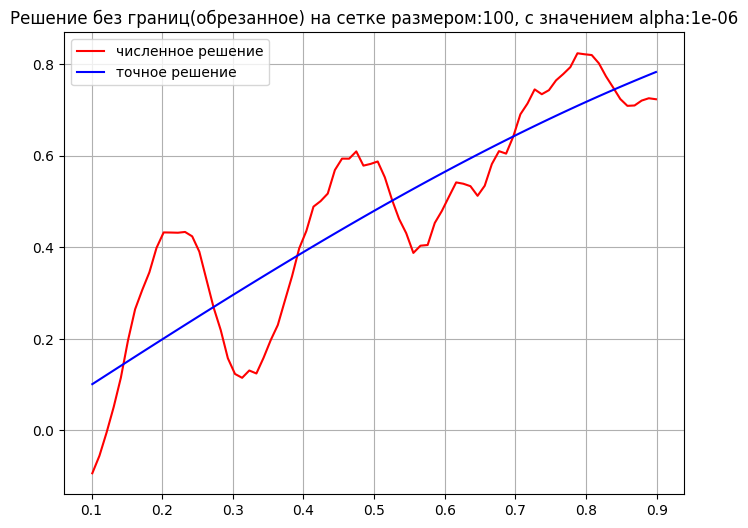

In [120]:
plt.figure(figsize=(8, 6))
plt.title(f'Решение без границ(обрезанное) на сетке размером:{n}, с значением alpha:{alpha}')
plt.plot(x[10:90],qq[10:90],label = 'численное решение',color = 'red')
plt.plot(x[10:90],real_one[10:90],label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()